In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import numpy as np

dataframe = pd.read_pickle('scrobbles.pkl')
dataframe = dataframe.set_index('time').sort_index()
mask = dataframe.index > dt(2009, 1, 1)
dataframe = dataframe[mask]

In [5]:
# Make a table of album name vs time indexed
unbinned = pd.get_dummies(dataframe['song'])

# Remove any duplicate scrobbles with the same time
unbinned = unbinned.groupby('time').min()

# Bin the table in 1 day groups
binned = unbinned.groupby(pd.TimeGrouper('1D')).sum()

# Sort the columns in descending order
sort = np.argsort(binned.to_numpy().sum(axis=0))
binned = binned.reindex(binned.columns[sort[::-1]], axis=1)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


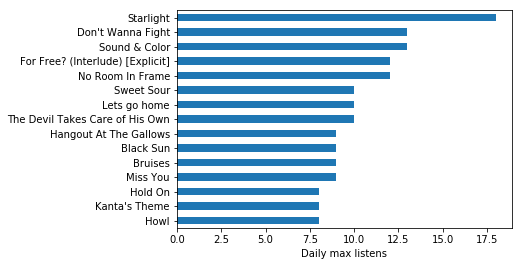

In [8]:
ax = binned.max().sort_values()[-15:].plot('barh')
ax.set_xlabel('Daily max listens')
plt.savefig('tmp/daily_max_listens_songs.png', bbox_inches='tight', dpi=200)